In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("international_matches.csv")

In [3]:
df.head()

date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4  1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                3  ...         No   
1                            0                1  ...         No   
2                            0                5  ...         No   
3                            0                1  ...         No   
4                            0                1  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0              Win                        NaN                        NaN   
1             Draw                        NaN                        NaN   
2              Win                        NaN                        NaN   
3              Win                        NaN                        NaN   
4             Lose                        NaN                        NaN   

   home_team_mean_defense_score home_team_mean_offense_score  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                           NaN                            NaN  
1                           NaN                            NaN  
2                           NaN                            NaN  
3                           NaN                            NaN  
4                           NaN                            NaN  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [5]:
#Question 1 - Top 10 ranked teams

In [6]:
fifa_rank = df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home,away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team','date'],ascending=[True,False])
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank',ascending=True)[0:10].reset_index()
fifa_rank_top10 

team        date  rank
0       Brazil  2022-06-06     1
1      Belgium  2022-06-14     2
2       France  2022-06-13     3
3    Argentina  2022-06-05     4
4      England  2022-06-14     5
5        Italy  2022-06-14     6
6        Spain  2022-06-12     7
7     Portugal  2022-06-12     8
8       Mexico  2022-06-14     9
9  Netherlands  2022-06-14    10

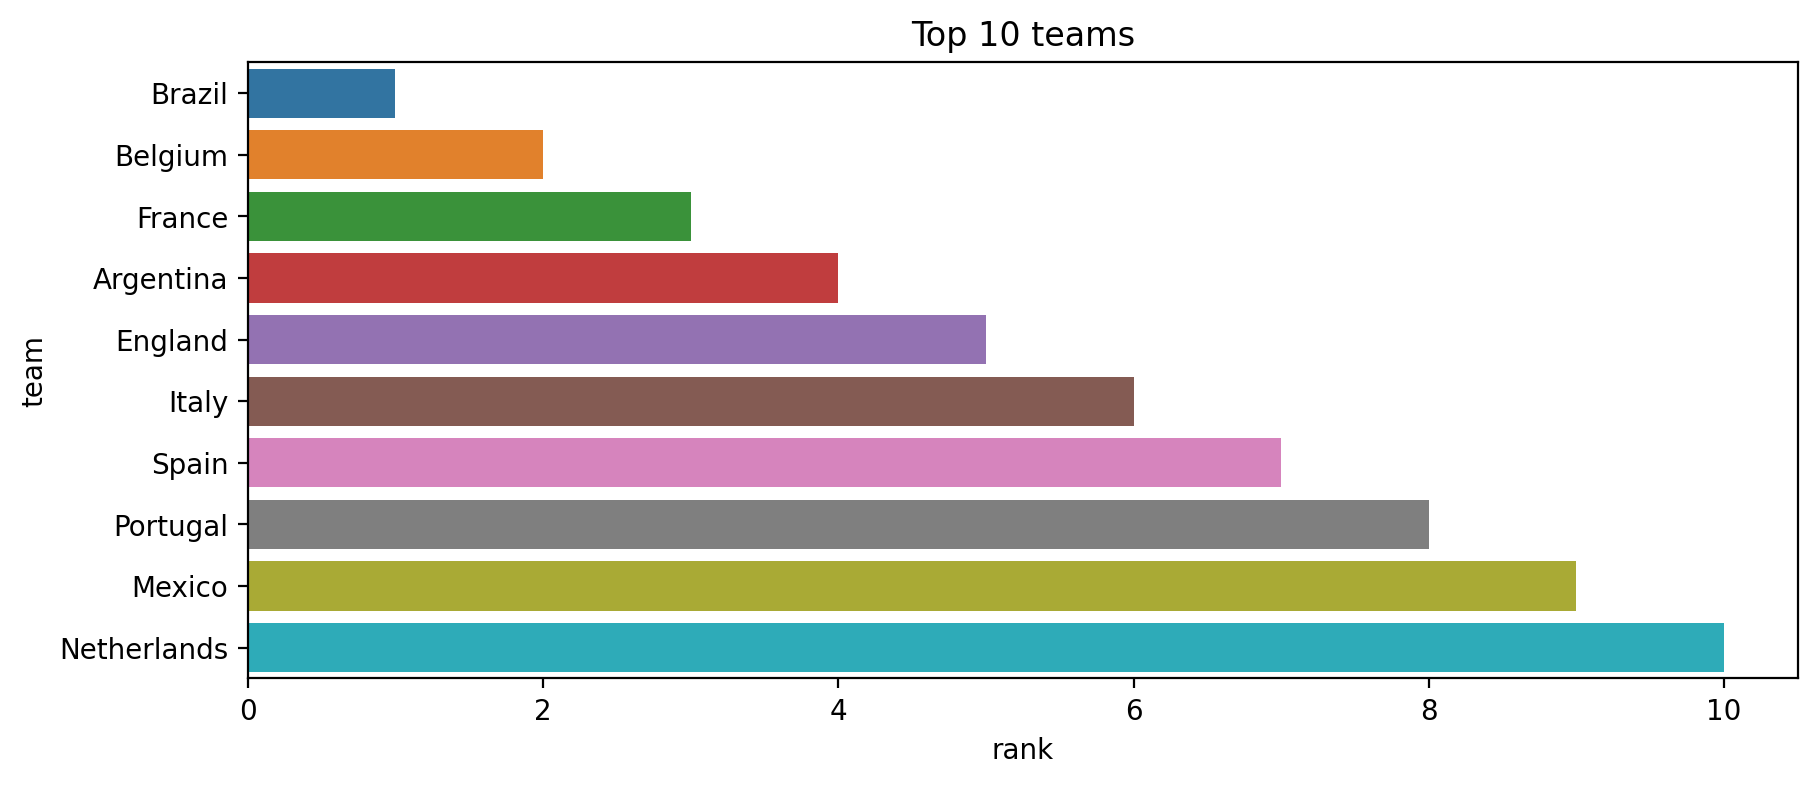

In [7]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=fifa_rank_top10,y='team',x='rank')
plt.title("Top 10 teams");

In [8]:
#Task = Win percentage of top 10 teams
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [9]:
fifa_rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Average_win_Per'] = round((fifa_rank_top10['Home_win_Per'] + fifa_rank_top10['Away_win_Per'])/2)
fifa_rank_win = fifa_rank_top10.sort_values('Average_win_Per',ascending=False)
fifa_rank_win

team        date  rank  Home_win_Per  Away_win_Per  Average_win_Per
0       Brazil  2022-06-06     1            78            60             69.0
6        Spain  2022-06-12     7            77            61             69.0
2       France  2022-06-13     3            66            57             62.0
3    Argentina  2022-06-05     4            68            49             58.0
4      England  2022-06-14     5            64            51             58.0
7     Portugal  2022-06-12     8            67            49             58.0
9  Netherlands  2022-06-14    10            62            55             58.0
5        Italy  2022-06-14     6            60            49             54.0
1      Belgium  2022-06-14     2            60            46             53.0
8       Mexico  2022-06-14     9            60            41             50.0

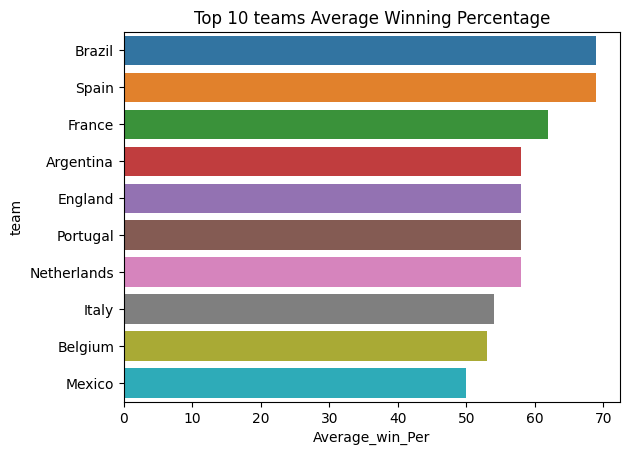

In [10]:
sns.barplot(data=fifa_rank_win,x='Average_win_Per',y='team')
plt.title("Top 10 teams Average Winning Percentage");

In [11]:
#Top 10 Attacking team
fifa_offense = df[['date', 'home_team', 'away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = fifa_offense[['date','home_team','home_team_mean_offense_score']].rename(columns={"home_team":"team","home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date','away_team','away_team_mean_offense_score']].rename(columns={"away_team":"team","away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home,away])
fifa_offense = fifa_offense.sort_values(['date','team'],ascending=[False,True])
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score',ascending=False)[0:10].reset_index()
fifa_offense_top10

team        date  offense_score
0  Argentina  2022-06-05           89.0
1     France  2022-06-13           88.3
2    England  2022-06-14           88.0
3     Brazil  2022-06-06           86.3
4   Portugal  2022-06-12           86.0
5    Belgium  2022-06-14           85.7
6      Italy  2022-06-14           85.3
7      Spain  2022-06-12           85.0
8     Poland  2022-06-14           84.7
9    Uruguay  2022-06-11           84.3

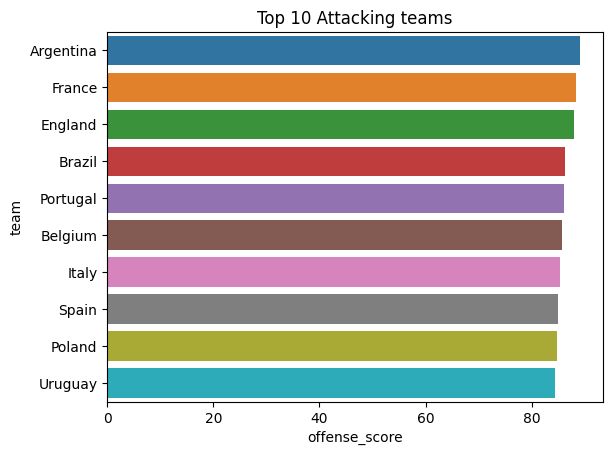

In [12]:
sns.barplot(data=fifa_offense_top10,x='offense_score',y='team')
plt.title("Top 10 Attacking teams");

In [13]:
#Top 10 Midfield team
fifa_midfield = df[['date', 'home_team', 'away_team','home_team_mean_midfield_score','away_team_mean_midfield_score']]
home = fifa_midfield[['date','home_team','home_team_mean_midfield_score']].rename(columns={"home_team":"team","home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

team        date  midfield_score
0    Germany  2022-06-14            87.8
1     France  2022-06-13            86.8
2      Spain  2022-06-12            86.0
3    Belgium  2022-06-14            85.5
4     Brazil  2022-06-06            85.5
5   Portugal  2022-06-12            84.5
6      Italy  2022-06-14            84.5
7    Croatia  2022-06-13            84.2
8    England  2022-06-14            84.0
9  Argentina  2022-06-05            84.0

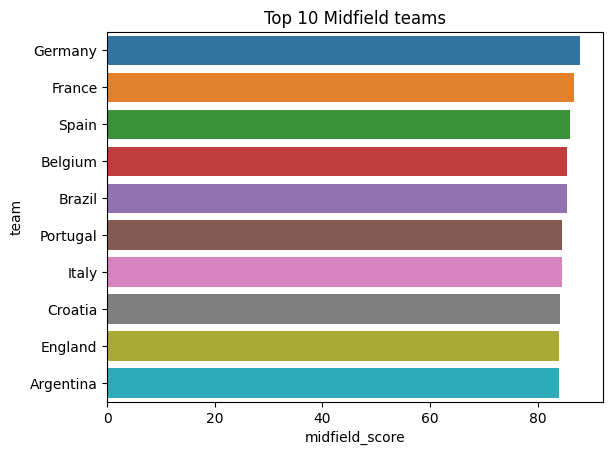

In [14]:
sns.barplot(data=fifa_midfield_top10,x='midfield_score',y='team')
plt.title("Top 10 Midfield teams");

In [15]:
#Top 10 defense team
fifa_defense = df[['date', 'home_team', 'away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = fifa_defense[['date','home_team','home_team_mean_defense_score']].rename(columns={"home_team":"team","home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home,away])
fifa_defense = fifa_defense.sort_values(['date','team'],ascending=[False,True])
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:10].reset_index()
fifa_defense_top10

team        date  defense_score
0        Spain  2022-06-12           86.5
1     Portugal  2022-06-12           85.2
2  Netherlands  2022-06-14           85.2
3      England  2022-06-14           85.0
4       Brazil  2022-06-06           84.8
5        Italy  2022-06-14           84.2
6       France  2022-06-13           84.2
7      Germany  2022-06-14           84.0
8    Argentina  2022-06-05           82.2
9      Uruguay  2022-06-11           81.2

Text(0.5, 1.0, 'Top 10 Defense Teams')

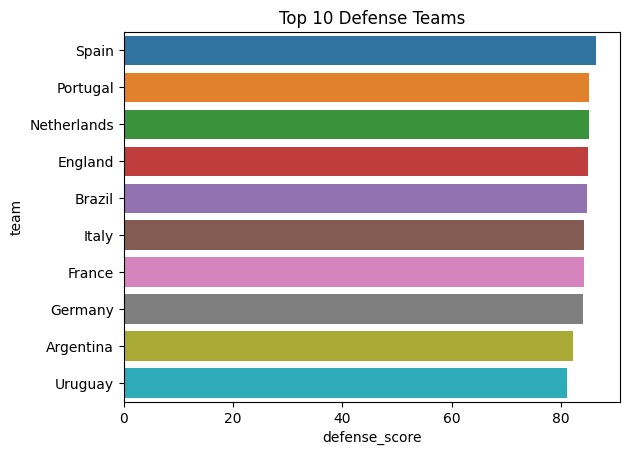

In [16]:
sns.barplot(data=fifa_defense_top10,x='defense_score',y='team')
plt.title("Top 10 Defense Teams")

In [17]:
#Task 1  - Analyze and fill na's

In [18]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [19]:
#We can fill mean for na's in goal_keeper_score
df[df['home_team'] == "Brazil"]['home_team_goalkeeper_score'].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [20]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [21]:
#We can fill mean for na's in defense score
df[df['away_team'] == "Uruguay"]['home_team_mean_defense_score'].describe()

count    105.000000
mean      76.580000
std        5.589988
min       58.500000
25%       73.200000
50%       76.500000
75%       80.000000
max       89.500000
Name: home_team_mean_defense_score, dtype: float64

In [22]:
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [23]:
#We can fill mean for na's in offense score
df[df['away_team'] == "Uruguay"]['home_team_mean_offense_score'].describe()

count    117.000000
mean      78.136752
std        5.878813
min       66.700000
25%       74.000000
50%       78.000000
75%       82.300000
max       90.300000
Name: home_team_mean_offense_score, dtype: float64

In [24]:
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [25]:
#We can fill mean for na's in midfield score
df[df['away_team'] == "Uruguay"]['home_team_mean_midfield_score'].describe()

count    110.000000
mean      77.729091
std        5.656617
min       63.200000
25%       75.050000
50%       77.650000
75%       81.425000
max       89.500000
Name: home_team_mean_midfield_score, dtype: float64

In [26]:
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [27]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [28]:
#Teams are not in FIFA game itself, so they are not performing well teams, so giving a average score of 50 for all.
df.fillna(50,inplace=True)

In [29]:
#Task 2 - Filter the teams participating in World cup 22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

In [30]:
#Task = Top 10 teams in Worldcup 22 with individual winning percentage

In [31]:
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])
#Select each country latest match
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank_top10 = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank_top10 = rank_top10[(rank_top10["team"].apply(lambda x: x in list_2022))][0:10]
rank_top10

team        date  rank
0        Brazil  2022-06-06     1
1       Belgium  2022-06-14     2
2        France  2022-06-13     3
3     Argentina  2022-06-05     4
4       England  2022-06-14     5
6         Spain  2022-06-12     7
7      Portugal  2022-06-12     8
8        Mexico  2022-06-14     9
9   Netherlands  2022-06-14    10
10      Denmark  2022-06-13    11

In [32]:
rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(rank_top10['team'])
rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(rank_top10['team'])
rank_top10['Average_win_Per'] = round((rank_top10['Home_win_Per'] + rank_top10['Away_win_Per'])/2)
rank_top10_Win = rank_top10.sort_values('Average_win_Per',ascending=False)
rank_top10_Win

team        date  rank  Home_win_Per  Away_win_Per  Average_win_Per
0        Brazil  2022-06-06     1            78            60             69.0
6         Spain  2022-06-12     7            77            61             69.0
2        France  2022-06-13     3            66            57             62.0
3     Argentina  2022-06-05     4            68            49             58.0
4       England  2022-06-14     5            64            51             58.0
7      Portugal  2022-06-12     8            67            49             58.0
9   Netherlands  2022-06-14    10            62            55             58.0
1       Belgium  2022-06-14     2            60            46             53.0
8        Mexico  2022-06-14     9            60            41             50.0
10      Denmark  2022-06-13    11            56            45             50.0

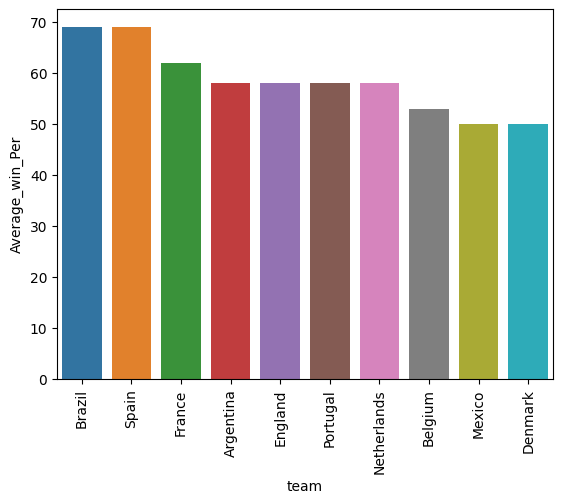

In [33]:
sns.barplot(data=rank_top10_Win,x='team',y='Average_win_Per')
plt.xticks(rotation=90);

In [34]:
#Mapping numeric values for home_team_result to find the correleations
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

C:\Users\Solo\AppData\Local\Temp\ipykernel_11812\3165474010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})


In [35]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.165981
home_team_mean_defense_score     0.158841
home_team_mean_midfield_score    0.157639
home_team_score                  0.127916
home_team_goalkeeper_score       0.122509
away_team_fifa_rank              0.111366
home_team_total_fifa_points      0.015498
away_team_total_fifa_points     -0.047726
neutral_location                -0.066361
away_team_mean_offense_score    -0.117055
away_team_mean_defense_score    -0.122354
away_team_goalkeeper_score      -0.124837
away_team_mean_midfield_score   -0.127505
home_team_fifa_rank             -0.186355
away_team_score                 -0.464635
Name: home_team_result, dtype: float64

In [36]:
#Dropping unnecessary colums
final_df = final_df.drop(['date', 'home_team_continent','away_team_continent','home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_score', 'away_team_score', 'tournament', 'city', 'country','neutral_location', 'shoot_out'],axis=1)

In [37]:
final_df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [38]:
#change column names
final_df.rename(columns={"home_team":"Team1", "away_team": "Team2", "home_team_fifa_rank": "Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"},inplace=True)

<AxesSubplot:>

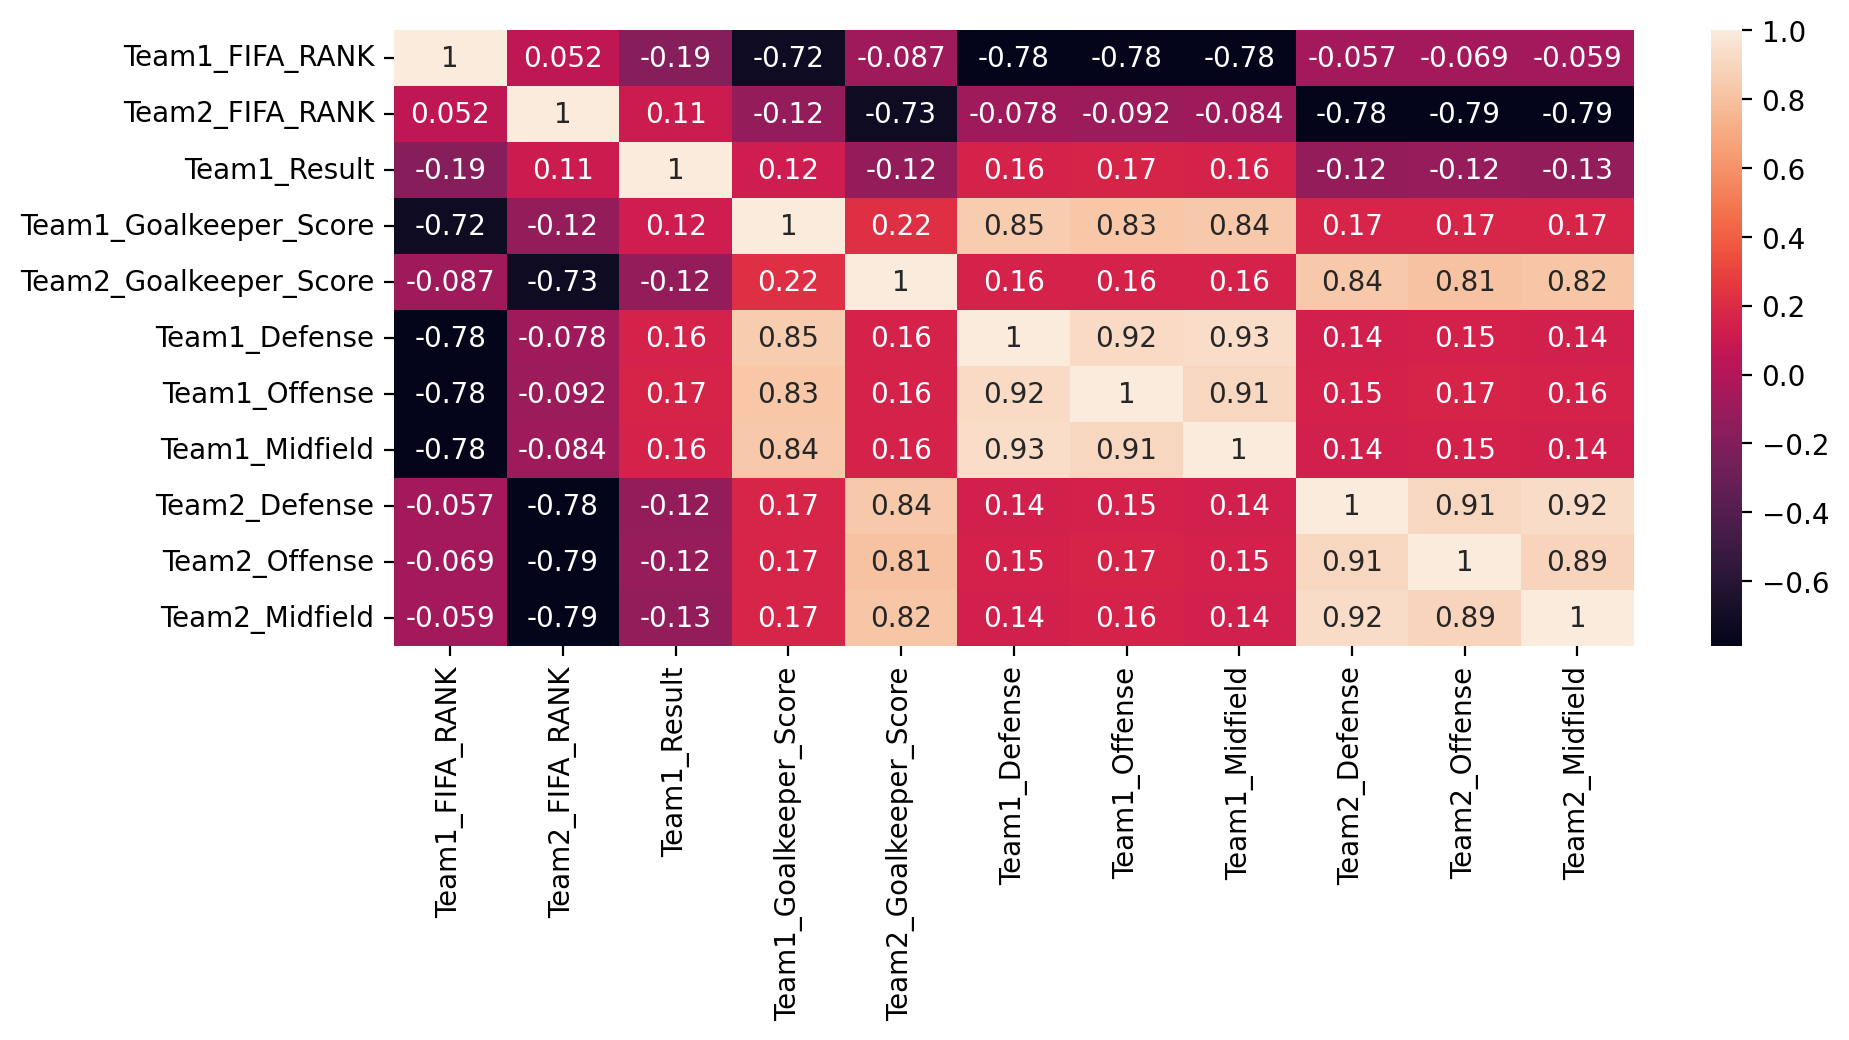

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(final_df.corr(),annot=True)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9321 entries, 0 to 23920
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   9321 non-null   object 
 1   Team2                   9321 non-null   object 
 2   Team1_FIFA_RANK         9321 non-null   int64  
 3   Team2_FIFA_RANK         9321 non-null   int64  
 4   Team1_Result            9321 non-null   int64  
 5   Team1_Goalkeeper_Score  9321 non-null   float64
 6   Team2_Goalkeeper_Score  9321 non-null   float64
 7   Team1_Defense           9321 non-null   float64
 8   Team1_Offense           9321 non-null   float64
 9   Team1_Midfield          9321 non-null   float64
 10  Team2_Defense           9321 non-null   float64
 11  Team2_Offense           9321 non-null   float64
 12  Team2_Midfield          9321 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1019.5+ KB


In [42]:
#final_df.to_csv("ExtraData.csv")

In [44]:
#Interchanged Team1 and Team 2 details to get accuracy results
final_df = pd.read_csv("ExtraData.csv")
final_df.tail()

Team1           Team2  Team1_FIFA_RANK  Team2_FIFA_RANK  \
18637    Wales     Netherlands               18               10   
18638  Belgium          Poland                2               26   
18639    Ghana           Chile               60               28   
18640  Tunisia           Japan               35               23   
18641    Egypt  Korea Republic               32               29   

       Team1_Result  Team1_Goalkeeper_Score  Team2_Goalkeeper_Score  \
18637             0                      74                      81   
18638             1                      89                      87   
18639             1                      74                      79   
18640             1                      64                      73   
18641             0                      70                      75   

       Team1_Defense  Team1_Offense  Team1_Midfield  Team2_Defense  \
18637             75             73              78             85   
18638             81             86              86             75   
18639             76             76              78             76   
18640             71             72              74             75   
18641             70             79              71             73   

       Team2_Offense  Team2_Midfield  
18637             83              84  
18638             85              76  
18639             77              78  
18640             75              78  
18641             80              74

In [45]:
#Holdout another DF for pipeline
pipe_DF = final_df
#Create dummies for categorical columns
final_df = pd.get_dummies(final_df)

In [46]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [48]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [49]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [50]:
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1048
           1       0.55      0.54      0.55      1094
           2       0.26      0.26      0.26       655

    accuracy                           0.48      2797
   macro avg       0.45      0.45      0.45      2797
weighted avg       0.48      0.48      0.48      2797



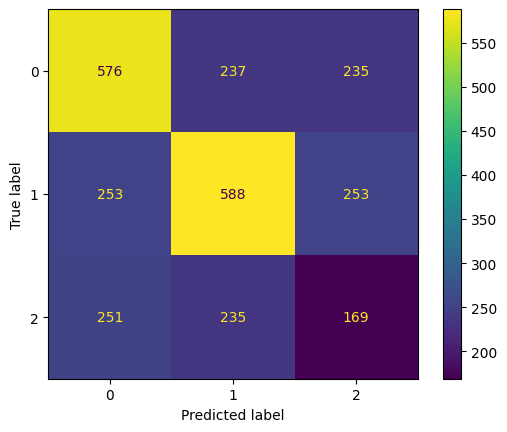

In [51]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.58      0.69      0.63      1048
           1       0.60      0.67      0.63      1094
           2       0.27      0.13      0.18       655

    accuracy                           0.55      2797
   macro avg       0.48      0.50      0.48      2797
weighted avg       0.51      0.55      0.52      2797



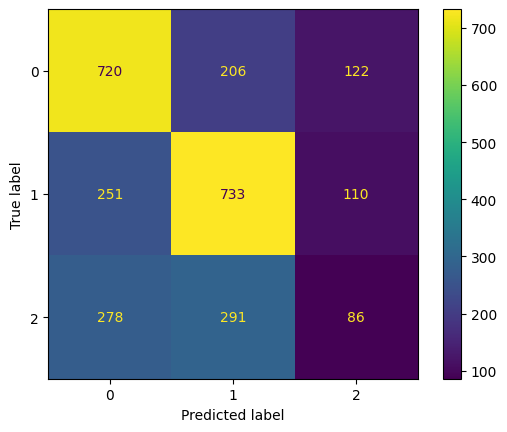

In [52]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1048
           1       0.59      0.77      0.67      1094
           2       0.46      0.03      0.05       655

    accuracy                           0.59      2797
   macro avg       0.55      0.52      0.46      2797
weighted avg       0.56      0.59      0.52      2797



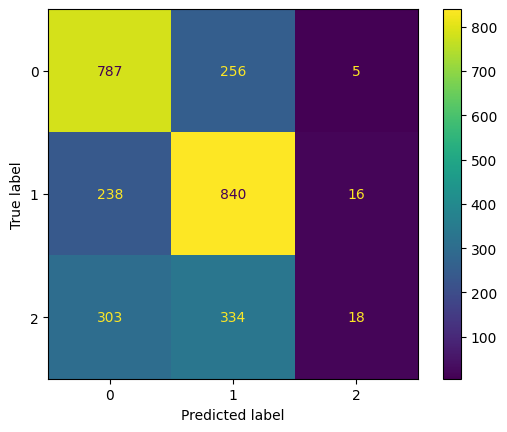

In [53]:
#Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

C:\Users\Solo\anaconda3\envs\DeepLearning\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[19:01:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.58      0.75      0.66      1048
           1       0.60      0.71      0.65      1094
           2       0.35      0.09      0.14       655

    accuracy                           0.58      2797
   macro avg       0.51      0.52      0.48      2797
weighted avg       0.54      0.58      0.53      2797



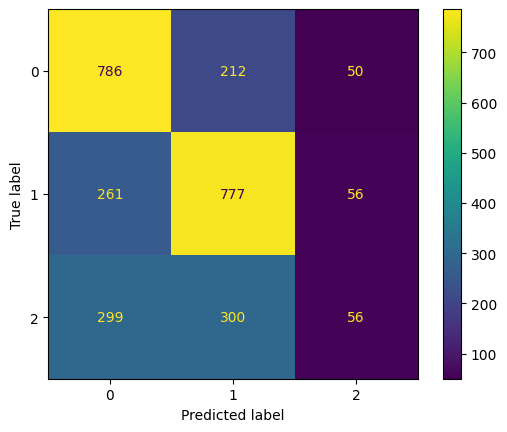

In [54]:
#XGB Boost
from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

In [55]:
X_train.shape

(13049, 420)

Epoch 1/10
327/327 [==============================] - 4s 5ms/step - loss: 0.9979 - accuracy: 0.5304 - val_loss: 0.9201 - val_accuracy: 0.5851
Epoch 2/10
327/327 [==============================] - 1s 5ms/step - loss: 0.9193 - accuracy: 0.5783 - val_loss: 0.9196 - val_accuracy: 0.5812
Epoch 3/10
327/327 [==============================] - 2s 6ms/step - loss: 0.8955 - accuracy: 0.5940 - val_loss: 0.9214 - val_accuracy: 0.5824
Epoch 4/10
327/327 [==============================] - 2s 6ms/step - loss: 0.8849 - accuracy: 0.5986 - val_loss: 0.9264 - val_accuracy: 0.5785
Epoch 5/10
327/327 [==============================] - 2s 6ms/step - loss: 0.8778 - accuracy: 0.5979 - val_loss: 0.9433 - val_accuracy: 0.5720
Epoch 6/10
327/327 [==============================] - 2s 6ms/step - loss: 0.8687 - accuracy: 0.6064 - val_loss: 0.9339 - val_accuracy: 0.5824
Epoch 7/10
327/327 [==============================] - 2s 6ms/step - loss: 0.8662 - accuracy: 0.6032 - val_loss: 0.9341 - val_accuracy: 0.5720
Epoch 

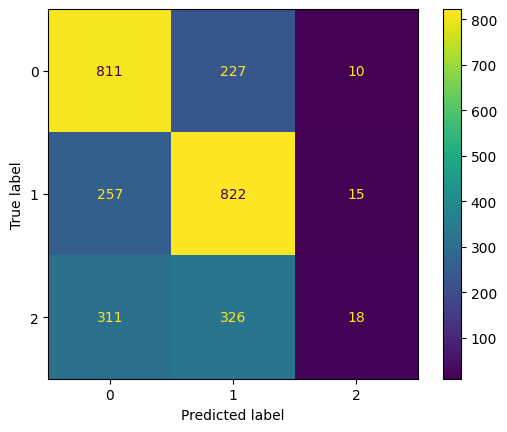

In [56]:
#simple Neural network
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

model = Sequential()
model.add(Input(shape=(420,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

C:\Users\Solo\anaconda3\envs\DeepLearning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1045
           1       0.64      0.73      0.68      1169
           2       0.22      0.07      0.11       582

    accuracy                           0.58      2796
   macro avg       0.48      0.50      0.47      2796
weighted avg       0.53      0.58      0.54      2796



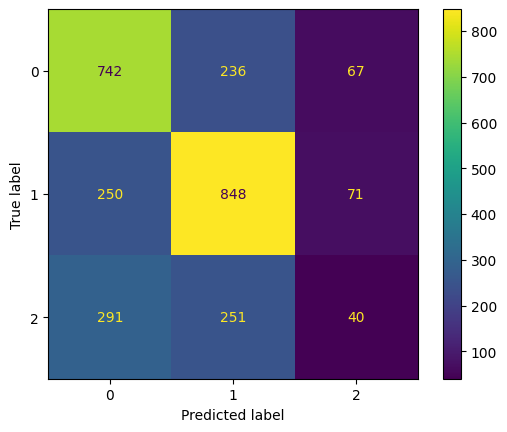

In [57]:
#Checking the final score on testing the holdout test in XGB
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [58]:
#XGB Model is finalised, so creating a pipeline for it

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

In [60]:
pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

In [61]:
from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False))
pipe_League.fit(pipe_X,pipe_y)

[19:03:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma...
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1,
                               objective='mult

In [62]:
import joblib
joblib.dump(pipe_League,"League_Predictions.pkl")

['League_Predictions.pkl']

In [63]:
model = joblib.load("League_Predictions.pkl")
model.predict(pipe_X.iloc[0:5])

array([0, 1, 1, 0, 0], dtype=int64)

In [64]:
#Predictions for Knockout Stage - Removing Draw status
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [65]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1082
           1       0.74      0.74      0.74      1083

    accuracy                           0.74      2165
   macro avg       0.74      0.74      0.74      2165
weighted avg       0.74      0.74      0.74      2165



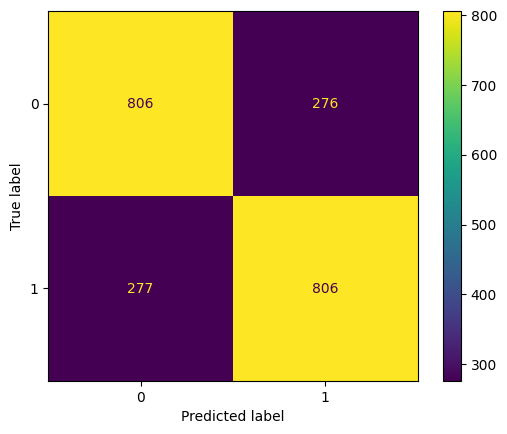

In [66]:
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1082
           1       0.75      0.77      0.76      1082

    accuracy                           0.76      2164
   macro avg       0.76      0.76      0.76      2164
weighted avg       0.76      0.76      0.76      2164



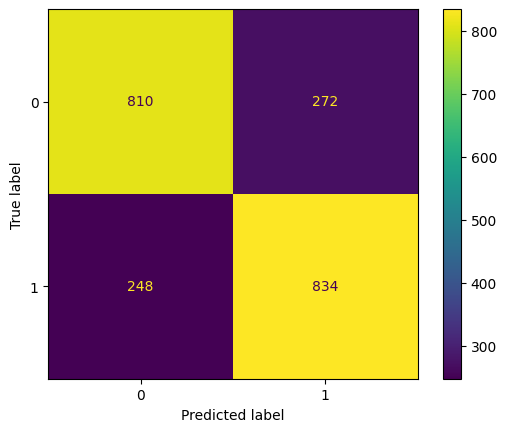

In [67]:
#Random Forest is giving good accuracy, so testing with holdout test and finalising the model
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

In [68]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),RandomForestClassifier())
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [69]:
joblib.dump(pipe_knock,"KnockOut_Predictions.pkl")

['KnockOut_Predictions.pkl']

In [70]:
model = joblib.load("KnockOut_Predictions.pkl")
model.predict(pipe_X.iloc[0:5])

array([1, 1, 0, 0, 1], dtype=int64)

In [71]:
pipe_y.iloc[0:5]

0    1
2    1
3    0
4    0
5    1
Name: Team1_Result, dtype: int64

In [72]:
pipe_X.columns

Index(['Team1', 'Team2', 'Team1_FIFA_RANK', 'Team2_FIFA_RANK',
       'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 'Team1_Defense',
       'Team1_Offense', 'Team1_Midfield', 'Team2_Defense', 'Team2_Offense',
       'Team2_Midfield'],
      dtype='object')

In [73]:
#Picking the column names also
joblib.dump(pipe_X.columns,"col_names.pkl")

['col_names.pkl']

In [74]:
joblib.load("col_names.pkl")

Index(['Team1', 'Team2', 'Team1_FIFA_RANK', 'Team2_FIFA_RANK',
       'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 'Team1_Defense',
       'Team1_Offense', 'Team1_Midfield', 'Team2_Defense', 'Team2_Offense',
       'Team2_Midfield'],
      dtype='object')